# Project - Data Science

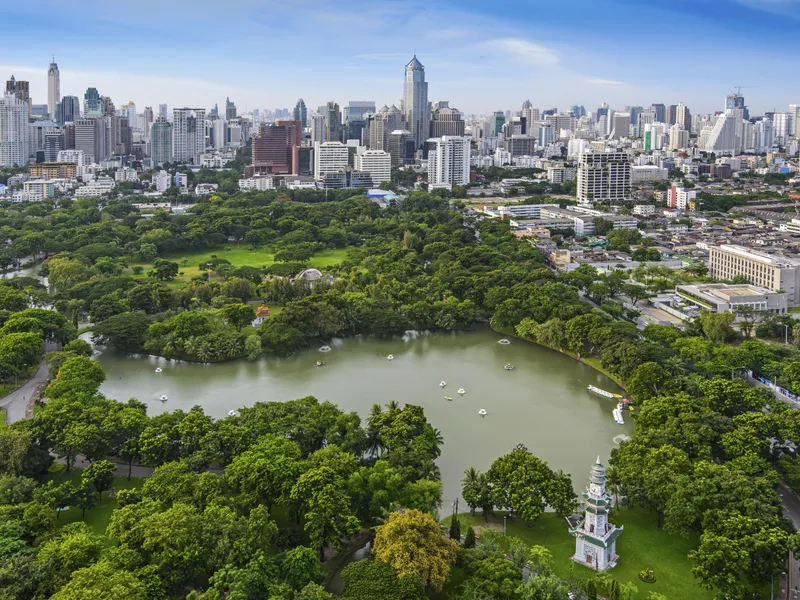

## Fullname (nickname): Thanapong (Billy)


## Project Topic: Exploratory of CO2 emission in Thailand

## Current Situation / Problem Statement
---

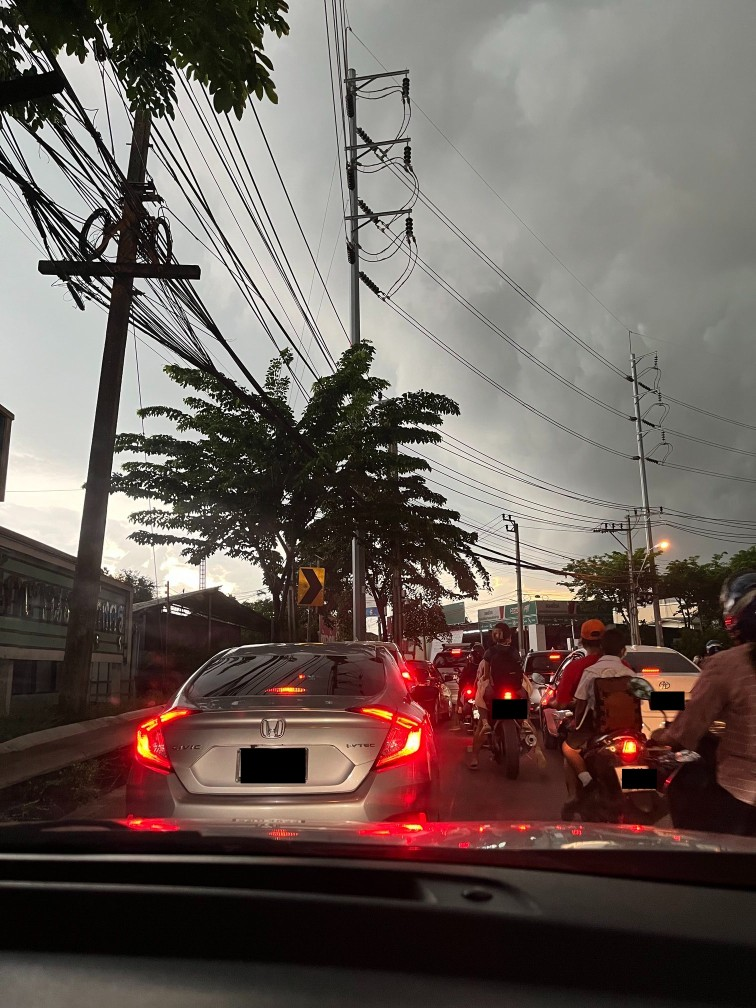


       The 29th of August 2022 the sky has been covered by the dark cloud. The majority of people think this is a 
       bad sign, but in reality, it is the phenomena known as "extreme weather" that caused by greenhouse gases.
       
       World Bank data shows that the quantity of CO2 emissions in Thailand is increasing every year. which results 
       in climate change, rising sea levels, hotter weather, and flooding. At the same time, the new president of
       Bangkok,"Chatchart", wants to launch a campaign to increase the green space in Bangkok by plating 1 million 
       trees to reduce greenhouse gases in BKK. Is this campaign gonna solve CO2 problem for BKK ? How about the 
       amount of green space we have right now, is it not effective enough? Furthermore, I decided to find the 
       cause,solution for this problem.
    
    









## Objectives:
- To find the solution to reduce CO2 emission by 2% in 2023


## Hypothesis-driven Questions:

* What factor that affects the increasing of CO2 emission

* Do green spaces in BKK effectively enough  to reduced CO2 quantity in bangkok?

---

## Outline:
>## 1. Dataset 
> ## 2. Data Preparation
> ## 3. EDA
> ## 4. Conclusion (key finding, benefits)
---

## Dataset:

**section 1** 

    - The dataset of CO2 emission in World
    
    - The dataset of Forest area(% land area) in World
    

**section 2** 

       Due to there is no dataset of CO2 emission in each district of BKK, so this section will be the roughly 
    calculation.
    
    - The dataset of CO2 emission per capita in Thailand
    
    - The dataset of people in each district in bangkok
    
    - The dataset of postal code in each district
   
    - The dataset of green space in bangkok
    
    - The dataset of BKK map (.shp format)

    
    
**section 3** 

    - The dataset of CO2 emission by the usage sector.





In [1]:
# import all libraries needed
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd # using for plotting map 
from mpl_toolkits.axes_grid1 import make_axes_locatable
import warnings
warnings.filterwarnings('ignore') # suppress warning


#data for section 1
forest_world = pd.read_csv('./data/forest_world.csv')
CO2_world = pd.read_csv('./data/CO2_world_bank.csv')

#data for section 2
map_df = gpd.read_file('./data/tha/tha_admbnda_adm2_rtsd_20220121.shp')
pop_bkk = pd.read_csv('./data/people_by_district.csv')
bkkpost = pd.read_csv('./data/bkk_postal.csv')
green_bkk = pd.read_csv('./data/bkk_green.csv')


#data for section 3
en_sector_data = pd.read_csv ('./data/dataset_11_61.csv')



## Data Preparation (Data Cleaning):


* examine & clean data
* turn dataset into proper format ready for EDA

FYI : all dataset have no NaN value

### Section 1

In [2]:
CO2_world.head(3)

,Year,CO2_world
0,1990,20625272.97
1,1991,20766900.89
2,1992,20796958.43


In [3]:
CO2_world.info()# no 'NaN' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Year       30 non-null     int64  
 1   CO2_world  30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [4]:
forest_world.head(3)

,Year,Forest
0,1990,31.624509
1,1991,31.568815
2,1992,31.620467


In [5]:
forest_world.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    27 non-null     int64  
 1   Forest  27 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 560.0 bytes


### Section 2

In [6]:
map_df.head(2)

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,ADM1_EN,ADM1_TH,ADM1_PCODE,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry
0,0.085417,0.00045,Phra Nakhon,พระนคร,TH1001,None,None,None,None,None,Bangkok,กรุงเทพมหานคร,TH10,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.50075 13.74107, 100.49981 13.738..."
1,0.134132,0.00095,Dusit,ดุสิต,TH1002,None,None,None,None,None,Bangkok,กรุงเทพมหานคร,TH10,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.52000 13.80000, 100.52074 13.799..."


In [7]:
map_df.info() # no NaN value

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 928 entries, 0 to 927
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  928 non-null    float64 
 1   Shape_Area  928 non-null    float64 
 2   ADM2_EN     928 non-null    object  
 3   ADM2_TH     928 non-null    object  
 4   ADM2_PCODE  928 non-null    object  
 5   ADM2_REF    0 non-null      object  
 6   ADM2ALT1EN  0 non-null      object  
 7   ADM2ALT2EN  0 non-null      object  
 8   ADM2ALT1TH  0 non-null      object  
 9   ADM2ALT2TH  0 non-null      object  
 10  ADM1_EN     928 non-null    object  
 11  ADM1_TH     928 non-null    object  
 12  ADM1_PCODE  928 non-null    object  
 13  ADM0_EN     928 non-null    object  
 14  ADM0_TH     928 non-null    object  
 15  ADM0_PCODE  928 non-null    object  
 16  date        928 non-null    object  
 17  validOn     928 non-null    object  
 18  validTo     0 non-null      object  
 19  

In [8]:
map_df['ADM1_EN'].describe() # there are 928 districts and 77 provinces in this file

count         928
unique         77
top       Bangkok
freq           50
Name: ADM1_EN, dtype: object

In [9]:
pop_bkk.head(3)

,ปีเดือน,รหัสจังหวัด,ชื่อจังหวัด,รหัสสำนักทะเบียน,ชื่อสำนักทะเบียน,รหัสตำบล,ชื่อตำบล,รหัสหมู่บ้าน,ชื่อหมู่บ้าน,จำนวนประชากรชาย,จำนวนประชากรหญิง,จำนวนประชากรทั้งหมด,จำนวนบ้าน (หลังคาเรือน)
0,﻿6412,0,ทั่วประเทศ,0,-,0,-,0,-,"32,339,118","33,832,321","66,171,439","27,708,635"
1,6412,10,กรุงเทพมหานคร,0,-,0,-,0,-,"2,592,292","2,935,702","5,527,994","3,147,231"
2,6412,10,กรุงเทพมหานคร,1001,ท้องถิ่นเขตพระนคร,0,-,0,-,"20,753","22,309","43,062","19,140"


In [10]:
pop_bkk.info() # no NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2527 entries, 0 to 2526
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   ปีเดือน                  2527 non-null   object
 1   รหัสจังหวัด              2527 non-null   int64 
 2   ชื่อจังหวัด              2527 non-null   object
 3   รหัสสำนักทะเบียน         2527 non-null   int64 
 4   ชื่อสำนักทะเบียน         2527 non-null   object
 5   รหัสตำบล                 2527 non-null   int64 
 6   ชื่อตำบล                 2527 non-null   object
 7   รหัสหมู่บ้าน             2527 non-null   int64 
 8   ชื่อหมู่บ้าน             2527 non-null   object
 9   จำนวนประชากรชาย          2527 non-null   object
 10  จำนวนประชากรหญิง         2527 non-null   object
 11  จำนวนประชากรทั้งหมด      2527 non-null   object
 12  จำนวนบ้าน (หลังคาเรือน)  2527 non-null   object
dtypes: int64(4), object(9)
memory usage: 256.8+ KB


In [11]:
bkkpost.head(3)

,จังหวัด,อำเภอ,รหัสไปรษณีย์
0,กรุงเทพมหานคร,พระนคร,10200
1,กรุงเทพมหานคร,ดุสิต,10300
2,กรุงเทพมหานคร,หนองจอก,10530


In [12]:
bkkpost.info() # no NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   จังหวัด       50 non-null     object
 1   อำเภอ         50 non-null     object
 2   รหัสไปรษณีย์  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
green_bkk.head(3)

,รหัส,ชื่อเขต,ประชากร*,จำนวน-แห่ง,ไร่,งาน,ตร.วา,พื้นที่รวม ตร.ม.,อัตราส่วนพื้นที่สีเขียว (1)
0,1,เขตคลองเตย,"93,193",278,906,1,42.17,"1,450,168.68",15.56
1,2,เขตคลองสาน,"69,139",202,265,0,24.00,"424,096.00",6.13
2,3,เขตคลองสามวา,"204,900",451,"8,271",0,66.65,"13,233,866.60",64.59


In [14]:
green_bkk.info() # no NaN value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   รหัส                         50 non-null     int64  
 1   ชื่อเขต                      50 non-null     object 
 2   ประชากร*                     50 non-null     object 
 3   จำนวน-แห่ง                   50 non-null     int64  
 4   ไร่                          50 non-null     object 
 5   งาน                          50 non-null     int64  
 6   ตร.วา                        50 non-null     float64
 7   พื้นที่รวม ตร.ม.             50 non-null     object 
 8   อัตราส่วนพื้นที่สีเขียว (1)  50 non-null     float64
dtypes: float64(2), int64(3), object(4)
memory usage: 3.6+ KB


#### Create a function to merge multiple dataframe  (this function will be used many times)

In [15]:
def multi_merge_df(main,*args,**kwargs):
    '''This function will merge multiple dataframe
            Paremeters:
                    main (dataframe) : base dataframe
                    args (dataframe) : each dataframe that will assign into base df
                    kwargs (str) : key column for merge
            Return:
                    main : merged dataframe 
    '''
    for arg in args:
        for key in kwargs:
            main = pd.merge(main,arg,on = kwargs[key] )
    return main

#### Create new dataframe that contain only BKK province 

In [16]:
bkk_data = map_df[map_df['ADM1_EN'] == 'Bangkok'] 


#### Drop unuse columns

In [17]:
bkkpost.drop(columns='จังหวัด',inplace = True)
pop_bkk.drop(columns=['ปีเดือน','รหัสจังหวัด', 'รหัสสำนักทะเบียน', \
                        'รหัสตำบล', 'ชื่อตำบล', 'รหัสหมู่บ้าน',\
                        'ชื่อหมู่บ้าน', 'จำนวนประชากรชาย', 'จำนวนประชากรหญิง',\
                         'จำนวนบ้าน (หลังคาเรือน)'],inplace = True)
green_bkk.drop(columns=['รหัส', 'ประชากร*', 'จำนวน-แห่ง', 'ไร่', 'งาน', 'ตร.วา'\
       , 'อัตราส่วนพื้นที่สีเขียว (1)'],inplace=True)

In [18]:
bkkpost = bkkpost.rename(columns = {'อำเภอ':'district','รหัสไปรษณีย์':'zip_code'})
green_bkk = green_bkk.rename(columns = {'ชื่อเขต':'district','พื้นที่รวม ตร.ม.':'total_area (sq.m)'})


#### Create a dataframe that have only district and zip code columns in BKK 

In [19]:
bkkpost.columns = ['ADM2_TH','postal']


#### Create dataframe of people in each district

In [23]:
pop_bkk = pop_bkk.rename(columns = {'ชื่อจังหวัด':'province','ชื่อสำนักทะเบียน':'district','จำนวนประชากรทั้งหมด':'pops'})
pop_bkk = pop_bkk[pop_bkk['province']== 'กรุงเทพมหานคร']
pop_bkk['district'] = pop_bkk['district'].str.replace('ท้องถิ่นเขต','') #remove "ท้องถื่นเขต" from all values in the column
pop_bkk['pops'] = pop_bkk['pops'].str.replace(',','') #remove comma from all values in the column
pop_bkk.drop(1)
pop_bkk = pop_bkk.drop(columns = 'province')
pop_bkk.columns=['ADM2_TH','POPS']


#### Create a dataframe of green space in each district

In [25]:
green_bkk['district'] = green_bkk['district'].str.replace('เขต','') #remove "เขต" from all values in the column
green_bkk['total_area (sq.m)'] = green_bkk['total_area (sq.m)'].str.replace(',','') #remove comma from all values in the column
green_bkk.columns=['ADM2_TH','Green_area(rhai)']


#### Use the function "merge_multi_dataframe" to merge every created dataframe

In [26]:
bkk_data = multi_merge_df(bkk_data,bkkpost,pop_bkk,green_bkk,on='ADM2_TH')

In [27]:
bkk_data

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,...,ADM0_EN,ADM0_TH,ADM0_PCODE,date,validOn,validTo,geometry,postal,POPS,Green_area(rhai)
0,0.085417,0.000450,Phra Nakhon,พระนคร,TH1001,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.50075 13.74107, 100.49981 13.738...",10200,43062,768965.64
1,0.134132,0.000950,Dusit,ดุสิต,TH1002,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.52000 13.80000, 100.52074 13.799...",10300,81494,1485534.44
2,0.676342,0.019859,Nong Chok,หนองจอก,TH1003,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.91398 13.94621, 100.91395 13.945...",10530,178856,24269928.64
3,0.085886,0.000337,Bang Rak,บางรัก,TH1004,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.51703 13.71808, 100.51703 13.718...",10500,45015,267375.08
4,0.301722,0.003415,Bang Khen,บางเขน,TH1005,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.60999 13.89078, 100.60997 13.890...",10220,186200,5088619.44
5,0.308691,0.002303,Bang Kapi,บางกะปิ,TH1006,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.62906 13.81937, 100.62910 13.819...",10240,142574,2069350.77
6,0.115324,0.000672,Pathum Wan,ปทุมวัน,TH1007,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.51907 13.75265, 100.51913 13.752...",10330,41763,1737060.00
7,0.156672,0.001102,Phra Khanong,พระโขนง,TH1009,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.61596 13.70633, 100.61597 13.706...",10260,87018,1076053.90
8,0.397346,0.005050,Min Buri,มีนบุรี,TH1010,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.80178 13.84264, 100.80183 13.842...",10510,141374,7724911.30
9,0.529699,0.010750,Lat Krabang,ลาดกระบัง,TH1011,None,None,None,None,None,...,Thailand,ประเทศไทย,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.79911 13.78199, 100.79943 13.781...",10520,178424,7619570.44


### Section 3

In [28]:
en_sector_data.head(3)

,Year,Month,Sector,Quantity,UNIT
0,1987,January,Power Generation,1203.63,"1,000 Tons"
1,1987,February,Power Generation,1067.01,"1,000 Tons"
2,1987,March,Power Generation,1286.76,"1,000 Tons"


In [29]:
en_sector_data.info() # no 'NaN' 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      1704 non-null   int64  
 1   Month     1704 non-null   object 
 2   Sector    1704 non-null   object 
 3   Quantity  1704 non-null   float64
 4   UNIT      1704 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 66.7+ KB


In [30]:
en_sector_data.nunique() #this data compose of 36 years and 4 sector of activities 

Year          36
Month         12
Sector         4
Quantity    1701
UNIT           1
dtype: int64

In [31]:
en_sector_data['Sector'].unique() # the sectors are ...

array(['Power Generation', 'Transport', 'Industry', 'Other'], dtype=object)

## Exploratory Data Analysis (EDA):

### Section 1 - Do trees cause the reduction in CO2 ?

####   Merge the dataset of forest and CO2 emission in the world 

In [32]:
data2 = pd.merge(CO2_world,forest_world,on='Year')
data2.head(100)

,Year,CO2_world,Forest
0,1990,20625272.97,31.624509
1,1991,20766900.89,31.568815
2,1992,20796958.43,31.620467
3,1993,20937123.28,31.565509
4,1994,21052949.10,31.512496
5,1995,21652838.85,31.457344
6,1996,22110607.51,31.401586
7,1997,22492054.36,31.329022
8,1998,22613709.04,31.279438
9,1999,22720117.59,31.221965


#### Seek an correlation of merged dataset

In [33]:
data2.corr()[['Forest']] # create dataframe of correlation

,Forest
Year,-0.986485
CO2_world,-0.951738
Forest,1.000000


• According to the top cell, forest has the negative correlation with Year and CO2 in the world.

#### Plot correlation of forest and CO2 emission

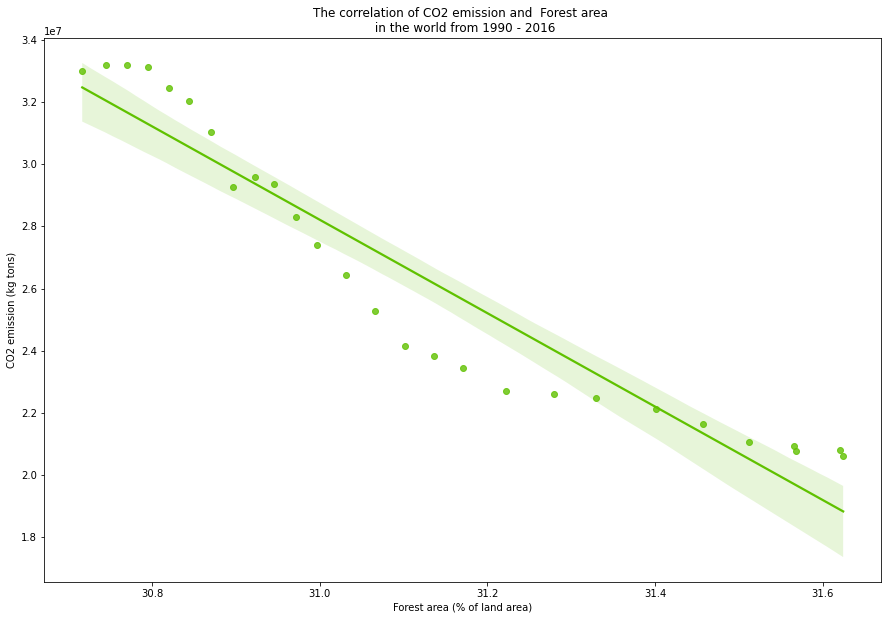

In [34]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.regplot(data2['Forest'].loc[0:26],data2['CO2_world'].loc[0:26],color = '#60C100') # using the seaborn regression to plot 
plt.title('The correlation of CO2 emission and  Forest area \n in the world from 1990 - 2016')
plt.xlabel('Forest area (% of land area)')
plt.ylabel('CO2 emission (kg tons)');



#### <font color=green>Section 1 summary</font>

<div class="alert alert-success"> From the figure, it shows that forest area has a negative correlation with CO2 emissions. This means trees are one of the main things that affect CO2 quantity in this world. The more deforestation, the more CO2 quantity there is. At present, the total land area is around 57,308,738 square miles which 0.8% decreasing of the forest area from 1990 - 2016 will be around 458,469 sq. miles. The losing of this amount of forest area will cause the increasing of CO2 around 733,550,400 tons-CO2/year</div>


### Section 2 - How about in our area? Is there enough green space to reduce the amount of CO2?

#### Calculate the CO2 emission in each district and assign into new a column call "local_CO2(tons CO2/y)"

In [35]:
bkk_data.dtypes

Shape_Leng           float64
Shape_Area           float64
ADM2_EN               object
ADM2_TH               object
ADM2_PCODE            object
ADM2_REF              object
ADM2ALT1EN            object
ADM2ALT2EN            object
ADM2ALT1TH            object
ADM2ALT2TH            object
ADM1_EN               object
ADM1_TH               object
ADM1_PCODE            object
ADM0_EN               object
ADM0_TH               object
ADM0_PCODE            object
date                  object
validOn               object
validTo               object
geometry            geometry
postal                 int64
POPS                  object
Green_area(rhai)      object
dtype: object

In [36]:
bkk_data['POPS'] = pd.to_numeric(bkk_data['POPS']) #change the column "populations" into number 
bkk_data['local_CO2(tons CO2/y)'] = round(bkk_data['POPS'] *3.731602163) # multiply by the quantity of CO2 per capita (2564)

####  Calculate the CO2 reduction from green space in bangkok


This is the concept to estimate the quantity of CO2 reduction from green space

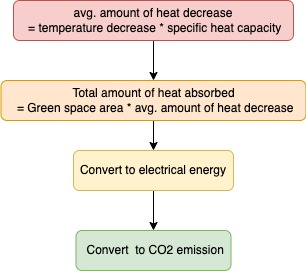

In [38]:
bkk_data['Green_area(rhai)'] = round(pd.to_numeric(bkk_data['Green_area(rhai)'])/1600) #change the column "green space" into number, 1600 sq.m. = 1 rhai 

bkk_data['CO2_reduction(tons CO2/y)'] = round((5*1256)*bkk_data['Green_area(rhai)']*0.278*1e-6*0.785*365*1e-3*1600) # calculate the capability of CO2 reduction from green space 



#### Calculate the percentage of CO2 that reduced by all green space in BKK

In [39]:
total_reduce = bkk_data['CO2_reduction(tons CO2/y)'].sum()
total_emission = bkk_data['local_CO2(tons CO2/y)'].sum()
reduce_percent = total_reduce/total_emission * 100
print(f'The available green space can reduce only {reduce_percent:.2f}% of the total CO2 emission in BKK.') # float with 2 decimal points

The available green space can reduce only 0.52% of the total CO2 emission in BKK.


#### Create "CO2" class to show the result of CO2 quantity, green space, and quantity of CO2 reduction in each district  

In [40]:
bkk_data[bkk_data['postal']==10140]
#map_data['local_CO2(tons CO2/y)']

,Shape_Leng,Shape_Area,ADM2_EN,ADM2_TH,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM2ALT1TH,ADM2ALT2TH,...,ADM0_PCODE,date,validOn,validTo,geometry,postal,POPS,Green_area(rhai),local_CO2(tons CO2/y),CO2_reduction(tons CO2/y)
22,0.172534,0.001065,Rat Burana,ราษฎร์บูรณะ,TH1024,None,None,None,None,None,...,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.49000 13.69526, 100.49015 13.694...",10140,77509,2195.0,289233.0,1757.0
47,0.261602,0.002674,Thung Khru,ทุ่งครุ,TH1049,None,None,None,None,None,...,TH,2019-02-18,2022-01-22,None,"POLYGON ((100.48577 13.65769, 100.48659 13.657...",10140,123392,3388.0,460450.0,2712.0


In [43]:
class CO2:
    '''This is a class to plot CO2_emission in local area, Green space ratio in your area, and The CO2 _ reduction needed for the better life '''
    def __init__(self,postcode):
        self.postcode = postcode #receive postcode variable
        
    def show_CO2_local(self):
        '''this function will plot the map of the specify postcode with the data of CO2 emission in the area'''
        map_data = bkk_data[bkk_data['postal']==self.postcode] #extract new dataframe that match with the specify postal code
        fig, ax = plt.subplots(figsize=(20, 10))
        fig.colorbar(plt.cm.ScalarMappable(cmap='BuGn', norm=plt.Normalize(vmin=0, vmax=100)))
        map_data.plot(column=map_data['local_CO2(tons CO2/y)'],ax=ax,cmap='Reds')# plot the map that contain value of CO2 emission 
        map_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['local_CO2(tons CO2/y)'])+'\ntons CO2/y', xy=x.geometry.centroid.coords[0],\
                                            ha='center'), axis=1) # label the map plot
        plt.title('Quantity CO2 emission')
        #plt.colorbar()
        plt.show()
        
    #------------------------------- function below will do the same just only change the data to plot ---------------------------
        
    def show_green_local(self):
        '''this function will plot the map of the specify postcode with the data of green space in the area'''
        map_data = bkk_data[bkk_data['postal']==self.postcode]#edit pen postcode
        fig, ax = plt.subplots(figsize=(20, 10))
        map_data.plot(column=map_data['Green_area(rhai)'],ax=ax,cmap='Greens')
        map_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['Green_area(rhai)'])+'\nrai', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
        plt.title('Quantity green space')
        plt.show()
        
    def show_green_bkk(self):
        '''this function will plot the map of the bkk with the data of green space '''
        fig, ax = plt.subplots(figsize=(30,20))
        bkk_data.plot(column=bkk_data['Green_area(rhai)'],ax=ax,cmap='Greens')
        bkk_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['Green_area(rhai)'])+'\nrai', xy=x.geometry.centroid.coords[0], ha='center',fontsize=8), axis=1)
        plt.title('Quantity green space',fontsize=20)
        plt.show()
        
    def show_CO2_bkk(self):
        '''this function will plot the map of the bkk with the data of CO2 emission '''
        fig, ax = plt.subplots(figsize=(30,20))
        bkk_data.plot(column=bkk_data['local_CO2(tons CO2/y)'],ax=ax,cmap='Reds')
        bkk_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['local_CO2(tons CO2/y)'])+'\ntons CO2/y', xy=x.geometry.centroid.coords[0], ha='center',fontsize=8), axis=1)
        plt.title('Quantity CO2 emission',fontsize=20)
        plt.show()
        
    def show_CO2_local_reduce(self):
        '''this function will plot the map of the specify postcode with the data of CO2 reduction in the area'''
        map_data = bkk_data[bkk_data['postal']==self.postcode]#edit pen postcode
        fig, ax = plt.subplots(figsize=(20, 10))
        map_data.plot(column=map_data['CO2_reduction(tons CO2/y)'],ax=ax,cmap='Blues')
        map_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['CO2_reduction(tons CO2/y)'])+'\ntons CO2/y', xy=x.geometry.centroid.coords[0], ha='center'), axis=1)
        plt.title('Quantity CO2 reduction')
        plt.show()
    
    def show_CO2_bkk_reduce(self):
        '''this function will plot the map of the bkk with the data of CO2 reduction '''
        fig, ax = plt.subplots(figsize=(30,20))
        bkk_data.plot(column=bkk_data['CO2_reduction(tons CO2/y)'],ax=ax,cmap='Blues')
        bkk_data.apply(lambda x: ax.annotate(text=x['ADM2_EN']+'\n'+str(x['CO2_reduction(tons CO2/y)'])+'\ntons CO2/y', xy=x.geometry.centroid.coords[0], ha='center',fontsize=8), axis=1)
        plt.title('Quantity CO2 reduction',fontsize=20)
        plt.show()
        


#### Create the user input interface to call a "CO2" class

Exploratory of CO2
What is your zip code : 10140
<------------------------------------------------------------>
Please select the number of interested
 
1.show the quantity of CO2 in your area 
2.show the quantity of green space in your area     
3.show the quantity of CO2 reduced in your area 
------------------------------------------------ 
4.show the quantity of CO2 in BKK 
5.show the quantity of green space in BKK     
6.show the quantity of CO2 reduced in BKK
Enter the option number (1,2,3,4,5,6) or enter -1 to exit : 5
You have select option 5


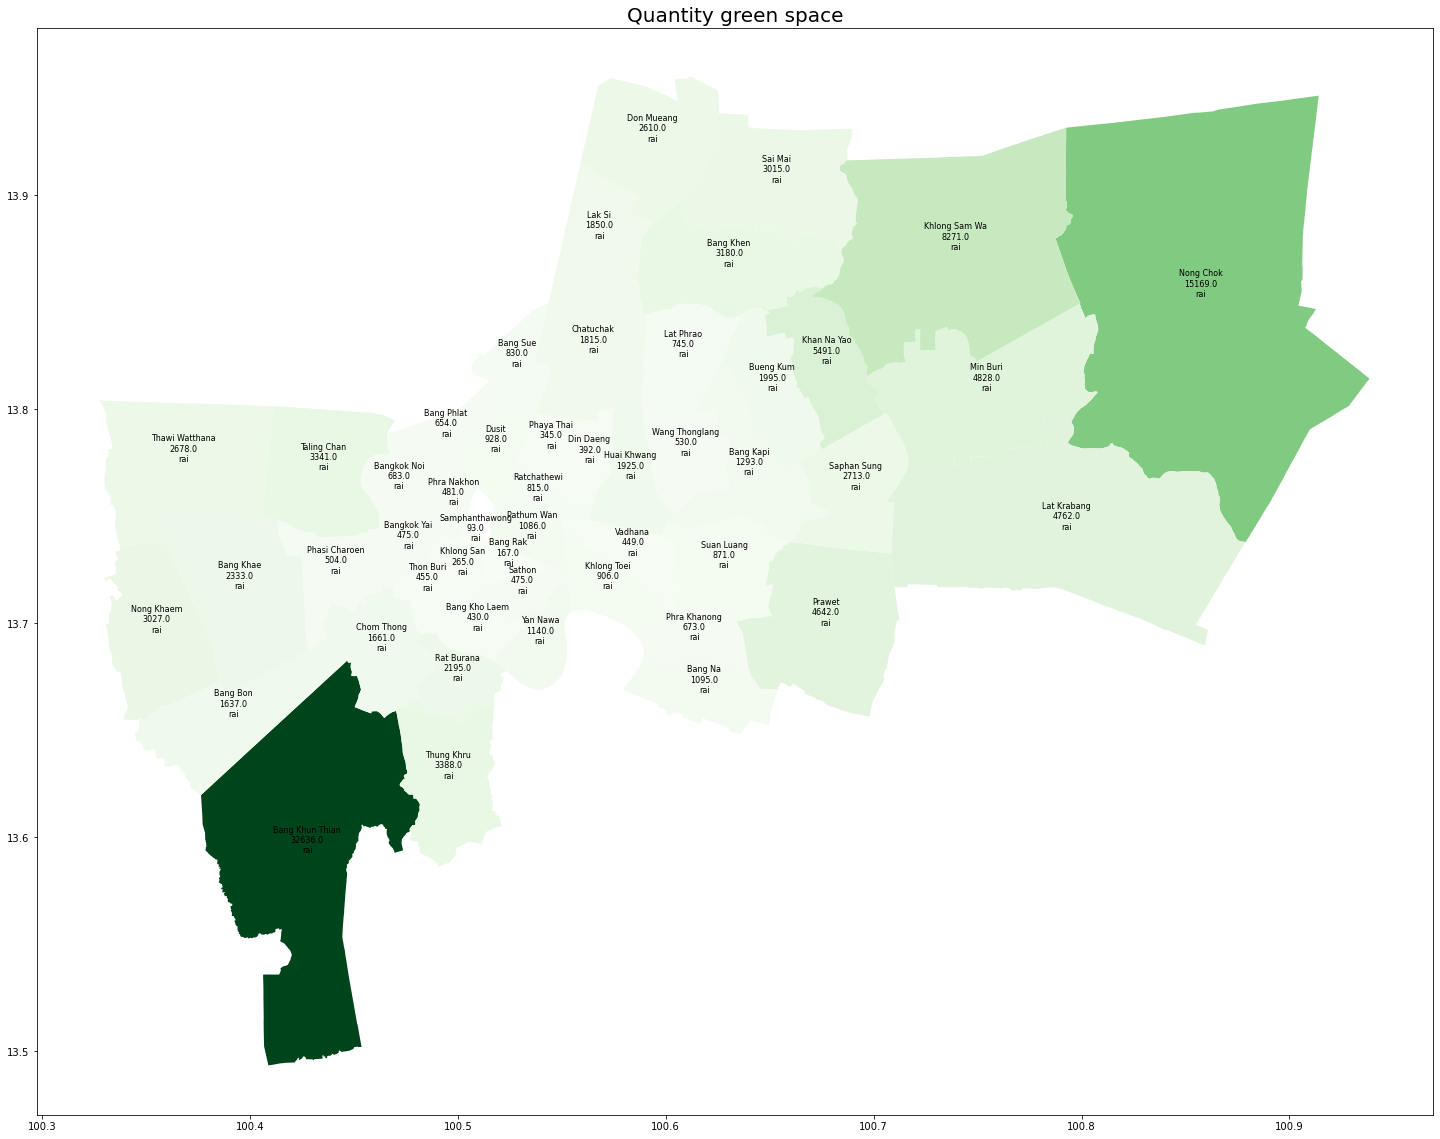

<------------------------------------------------------------>
Please select the number of interested
 
1.show the quantity of CO2 in your area 
2.show the quantity of green space in your area     
3.show the quantity of CO2 reduced in your area 
------------------------------------------------ 
4.show the quantity of CO2 in BKK 
5.show the quantity of green space in BKK     
6.show the quantity of CO2 reduced in BKK
Enter the option number (1,2,3,4,5,6) or enter -1 to exit : -1
You have select option -1
Thank you for using


In [44]:
postcode =int(input('Exploratory of CO2\nWhat is your zip code : ')) # get the zip code from user
ans = CO2(postcode)# put the postcode into CO2 class 


while True:
    print('<------------------------------------------------------------>')
    print('Please select the number of interested\n \n1.show the quantity of CO2 in your area \n2.show the quantity of green space in your area \
    \n3.show the quantity of CO2 reduced in your area \n------------------------------------------------ \n4.show the quantity of CO2 in BKK \n5.show the quantity of green space in BKK \
    \n6.show the quantity of CO2 reduced in BKK')
    option  = int(input('Enter the option number (1,2,3,4,5,6) or enter -1 to exit : '))
    print('You have select option',option)
    if option == 1:
        ans.show_CO2_local()
    elif option == 2:
        ans.show_green_local()
    elif option == 3:
        ans.show_CO2_local_reduce()
    elif option == 4:
        ans.show_CO2_bkk()
    elif option == 5:
        ans.show_green_bkk()
    elif option == 6:
        ans.show_CO2_bkk_reduce()
    elif option == -1:
        print('Thank you for using')
        break

### <font color=green>Section 2 summary</font>

<div class="alert alert-success"> The green space in BKK at present is not enough to meet the objective, as you can see the capability of CO2 reduction is only 0.52% of the total CO2 emission in BKK. Therefore, the Chatchart campaign is necessary and it will make a big change to the quantity of CO2 reduction in BKK. </div>





### Section 3 - Planting trees is too slow. Is there anyway to decrease the CO2 quantity rapidly?

#### Extract the quantity of CO2 in each sector and assign it to a new dataframe that grouped by year . 
#### Then merge all dataframe 

In [45]:
power = en_sector_data[en_sector_data['Sector'] == 'Power Generation'].set_index('Year').groupby('Year').sum()
indus = en_sector_data[en_sector_data['Sector'] == 'Industry'].set_index('Year').groupby('Year').sum()
trans = en_sector_data[en_sector_data['Sector'] == 'Transport'].set_index('Year').groupby('Year').sum()
other = en_sector_data[en_sector_data['Sector'] == 'Other'].set_index('Year').groupby('Year').sum()
data1 = multi_merge_df(trans,indus,power,other,on='Year') # using multi_merge_df function


#### Convert quantity unit to million tons CO2

In [46]:
data1 = data1 /1000
data1.columns=['Pow_quant','Tran_quant','Indus_quant','Other_quant'] #rename


#### The reduction rate of CO2 in transportation sector from 2018 to 2019

In [47]:
reduce = (data1['Tran_quant'].loc[2018] - data1['Tran_quant'].loc[2019]) / data1['Tran_quant'].loc[2018] *100
reduce

13.667287824569705

#### Plot the quantity of CO2 emission ineach sector from 1987-2021 


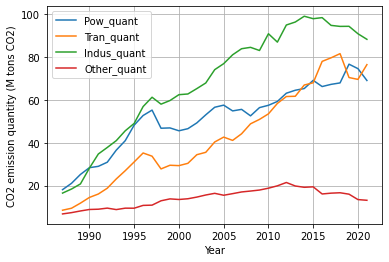

In [48]:
data1.drop(index=2022,inplace=True) #drop data of 2022 (uncompleted year)
data1.columns=['Pow_quant','Tran_quant','Indus_quant','Other_quant']
data1.plot(ylabel='CO2 emission quantity (M tons CO2)',kind='line',grid = True); # semicolon to neglect the disrupt text show before plot


### <font color=green>Section 3 summary</font>

<div class="alert alert-success"> From the figure, if you look closer at the CO2 emissions that came from the transportation sector in 2019. In the year of the pandemic, most people stayed at home. CO2 emissions have decreased by 13.67% since 2018. So, the strategy of WFH could decrease the CO2 quantity in the transport sector rapidly without waiting.  </div>


## Key Findings:

1. On this day, the green space in BKK is not enough to reduce the CO2 emissions to reach the objectives, so the new BKK president's campaign will be necessary.

2. According to EDA section 3, during the pandemic year the quantity of CO2 rapidly decrease, so WFH strategy will help to increase the reduction rate of CO2.



<div class="alert alert-info">
<h3>What’s Next / Recommendation:</h3>
</div>

1. The green space value should be shown in the ratio format of green space and land area in each district.

2. The map graph should add a color bar 

3. In section 2, the calculation should add more factors, e.g., water-land, to make the calculation more accurate. 

4. The correlation of quality of life and CO2 emission in each district should be observed.

<div class="alert alert-info">
<h3>Financial Benefit:</h3>
</div>

1. If there is a carbon tax, this script could be used as an inspection tool. 
2. Businesses in environmental fields, e.g., electric cars, trees, will have more demand in the carbon-rich area.

<div class="alert alert-info">
<h3>Non-Financial Benefit:</h3>
</div>

1. Raise CO2 awareness among local residents. 
2. To assess the quality of life in each district (including carbon footprint and green space in each district). 